In [ ]:
#Foundations of Machine Learning and
EDA| Assignment

Name - shivam kashyap
Course name - data analyst
City - Delhi
Github link - https://github.com/mrkashyap222/shivam-kashyap

In [ ]:
#Answer 1:

#AI
AI is a broad field focused on making machines act smart, like humans.
It includes anything that helps computers think, reason, or make decisions (e.g., chatbots, robots, game-playing systems).

#ML
ML is a part of AI where machines learn patterns from data instead of being explicitly programmed.
Examples: predicting prices, spam detection.

#DL
DL is a subset of ML that uses neural networks with many layers.
It works very well with large data, like images, audio, and text (e.g., face recognition, speech-to-text).

Data Science
Data Science is about collecting, analyzing, and interpreting data to make decisions.
It includes statistics, ML, data cleaning, and visualization. Example: analyzing customer trends or business insights.

In [ ]:
#Answer 2

Overfitting:
Overfitting happens when the model learns the training data too deeply, including noise and unnecessary details.
Because of this, it performs very well on training data but poorly on new/test data.

How to detect:

Training accuracy is high, but test accuracy is low.

The model shows high variance (too sensitive to small changes).
How to prevent:

Use cross-validation to check how the model performs on different splits of data.

Apply regularization (L1/L2, dropout in deep learning) to reduce model complexity.

Use simpler models or collect more data.

Underfitting:
Underfitting happens when the model is too simple and cannot capture the pattern in the data.

How to detect:

Both training and test accuracy are low.

The model has high bias (oversimplified assumptions).
How to prevent:

Use a more complex model.

Reduce regularization strength.

Add more meaningful features.

Bias–Variance Tradeoff:
A good model should balance bias and variance.

Too much bias → underfitting.

Too much variance → overfitting.
The goal is to find the sweet spot where the model generalizes well.

In [ ]:
#Answer 3:

There are several ways to handle missing values in a dataset:

Deletion (Removing Rows/Columns):
If only a few rows have missing values, we can drop them.
Example: If 2 out of 500 rows have missing age values, simply remove those rows.

Mean/Median Imputation:
Replace missing numerical values with the mean or median of that column.
Example: If a column “Salary” has missing values, we can fill them with the median salary.

Predictive Modeling (Advanced Imputation):
Use another model to predict the missing value.
Example: Predict missing “Age” using features like salary, education, or experience.

In [ ]:
#Answer 4:

An imbalanced dataset is when one class has many more samples than the other.
Example: In fraud detection, 98% transactions are normal and 2% are fraud.
This makes the model biased toward the majority class.

Two techniques to handle this:

SMOTE (Synthetic Minority Oversampling Technique):
This creates new synthetic samples for the minority class.
Practical example: Generating new “fraud” samples so the model sees more fraud cases.

Random Under/Oversampling:

Oversampling: Duplicate minority class samples.

Undersampling: Remove some majority class samples.
Practical example: Reduce normal transactions or duplicate fraud cases to balance data.

Class Weights in Models (additional practical method):
Give higher weight to the minority class so the model pays more attention to it.
Example: In logistic regression or random forest, set class_weight='balanced'.

In [ ]:
#Answer 5:

Feature scaling is important because ML algorithms work better when all features are on a similar scale. Without scaling, features with large values dominate features with small values. This affects distance-based algorithms like KNN and SVM, and also slows down gradient descent in models like linear/logistic regression.

Min-Max Scaling:

Scales values between 0 and 1.

Useful when you need all values in a fixed range.
Example: Good for KNN and neural networks.

Standardization (Z-score Scaling):

Converts data to have mean = 0 and standard deviation = 1.

Works better when data has outliers or is normally distributed.
Example: Often used in SVM, logistic regression, and gradient descent–based algorithms.

In [ ]:
#Answer 6:

Label Encoding:

Converts categories into numeric labels (0, 1, 2…).

Best for ordinal data where the order matters.
Example: Size = Small < Medium < Large.

One-Hot Encoding:

Creates separate columns for each category (0/1 values).

Best for nominal data where order does NOT matter.
Example: Colors like Red, Blue, Green.

When to prefer which:

Use Label Encoding when the categories have a natural order.

Use One-Hot Encoding when categories are just names without ranking to avoid giving false order.

In [ ]:
#7. Analyze the relationship between app categories and ratings. Which categories have the highest/lowest average ratings, and what could be the possible reasons?



import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/googleplaystore.csv')

df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Group by category and calculate average rating
avg_ratings = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

avg_ratings



,Rating
Category,
1.9,19.000000
EVENTS,4.435556
EDUCATION,4.389032
ART_AND_DESIGN,4.358065
BOOKS_AND_REFERENCE,4.346067
PERSONALIZATION,4.335987
PARENTING,4.300000
GAME,4.286326
BEAUTY,4.278571


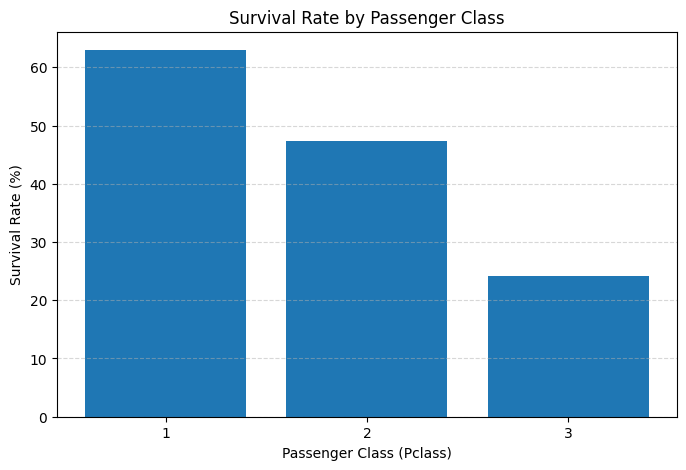

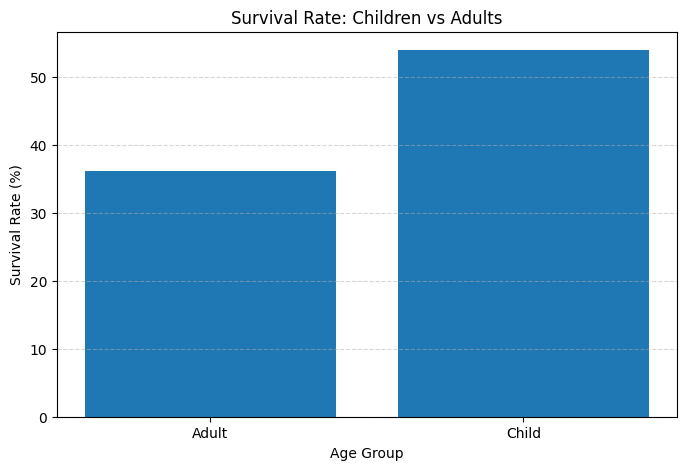

In [ ]:
#Question 8: Titanic Dataset
#a) Compare the survival rates based on passenger class (Pclass). Which class had the highest
#survival rate, and why do you think that happened?
#b) Analyze how age (Age) affected survival. Group passengers into children (Age < 18) and
#adults (Age ≥ 18). Did children have a better chance of survival?



import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/titanic.csv')
df['Survived'] = pd.to_numeric(df['Survived'], errors='coerce')
df['Pclass'] = pd.to_numeric(df['Pclass'], errors='coerce')
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

survival_by_class = df.groupby('Pclass')['Survived'].mean() * 100

plt.figure(figsize=(8,5))
plt.bar(survival_by_class.index.astype(str), survival_by_class.values)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class (Pclass)")
plt.ylabel("Survival Rate (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ---- B) Survival Rate: Children vs Adults ----
df['Age_Group'] = df['Age'].apply(lambda x: 'Child' if x < 18 else 'Adult')
survival_by_age = df.groupby('Age_Group')['Survived'].mean() * 100

plt.figure(figsize=(8,5))
plt.bar(survival_by_age.index, survival_by_age.values)
plt.title("Survival Rate: Children vs Adults")
plt.xlabel("Age Group")
plt.ylabel("Survival Rate (%)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


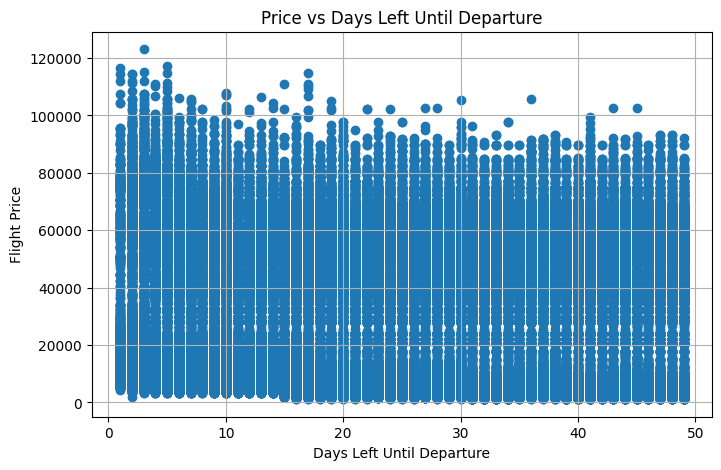

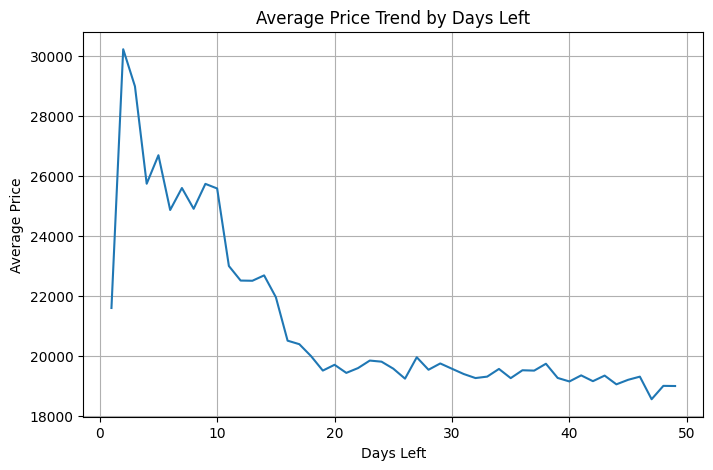

Average Price by Days Left:
days_left
1     21591.867151
2     30211.299801
3     28976.083569
4     25730.905653
5     26679.773368
6     24856.493902
7     25588.367351
8     24895.883995
9     25726.246072
10    25572.819134
11    22990.656070
12    22505.803322
13    22498.885384
14    22678.002363
15    21952.540852
16    20503.546237
17    20386.353949
18    19987.445168
19    19507.677375
20    19699.983390
21    19430.494058
22    19590.667385
23    19840.913451
24    19803.908896
25    19571.641791
26    19238.290278
27    19950.866195
28    19534.986047
29    19744.653119
30    19567.580834
31    19392.706612
32    19258.135308
33    19306.271739
34    19562.008266
35    19255.652996
36    19517.688444
37    19506.306516
38    19734.912316
39    19262.095556
40    19144.972439
41    19347.440460
42    19154.261659
43    19340.528894
44    19049.080174
45    19199.876307
46    19305.351623
47    18553.272038
48    18998.126851
49    18992.971888
Name: price, dtype: float64


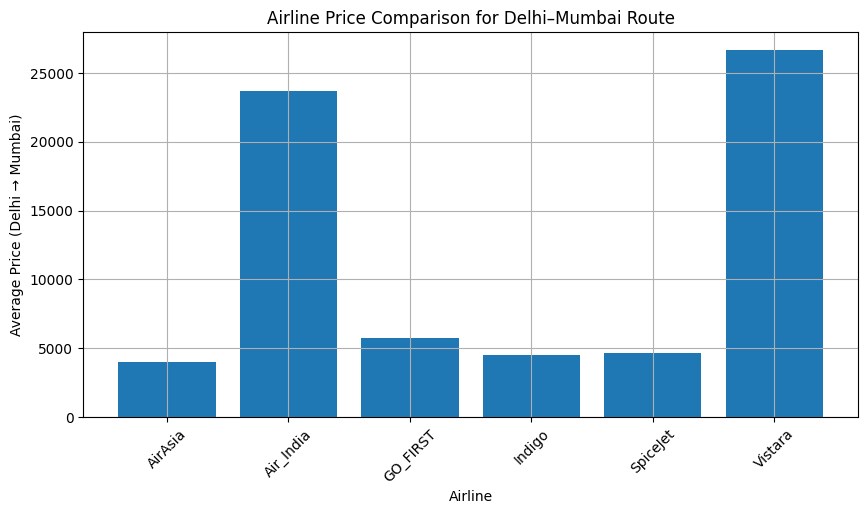

Average Price by Airline (Delhi → Mumbai):
airline
AirAsia       3981.191456
Air_India    23695.916916
GO_FIRST      5762.211515
Indigo        4473.739130
SpiceJet      4628.251984
Vistara      26630.293322
Name: price, dtype: float64


In [ ]:
#Question 9: Flight Price Prediction Dataset
#a) How do flight prices vary with the days left until departure? Identify any exponential price
#surges and recommend the best booking window.
#b)Compare prices across airlines for the same route (e.g., Delhi-Mumbai). Which airlines are
#consistently cheaper/premium, and why?


import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/flight_price.csv")

# -------------------------------
# A) PRICE VS DAYS LEFT
# -------------------------------

plt.figure(figsize=(8,5))
plt.scatter(df['days_left'], df['price'])
plt.xlabel("Days Left Until Departure")
plt.ylabel("Flight Price")
plt.title("Price vs Days Left Until Departure")
plt.grid(True)
plt.show()

# Calculate trend (mean price per days_left)
trend = df.groupby('days_left')['price'].mean()

plt.figure(figsize=(8,5))
plt.plot(trend.index, trend.values)
plt.xlabel("Days Left")
plt.ylabel("Average Price")
plt.title("Average Price Trend by Days Left")
plt.grid(True)
plt.show()

print("Average Price by Days Left:")
print(trend)


# -------------------------------
# B) AIRLINE COMPARISON (Delhi → Mumbai)
# -------------------------------

# Filter route
route_df = df[(df["source_city"] == "Delhi") & (df["destination_city"] == "Mumbai")]

# Group by airline
airline_avg = route_df.groupby("airline")["price"].mean()

plt.figure(figsize=(10,5))
plt.bar(airline_avg.index, airline_avg.values)
plt.xlabel("Airline")
plt.ylabel("Average Price (Delhi → Mumbai)")
plt.title("Airline Price Comparison for Delhi–Mumbai Route")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

print("Average Price by Airline (Delhi → Mumbai):")
print(airline_avg)


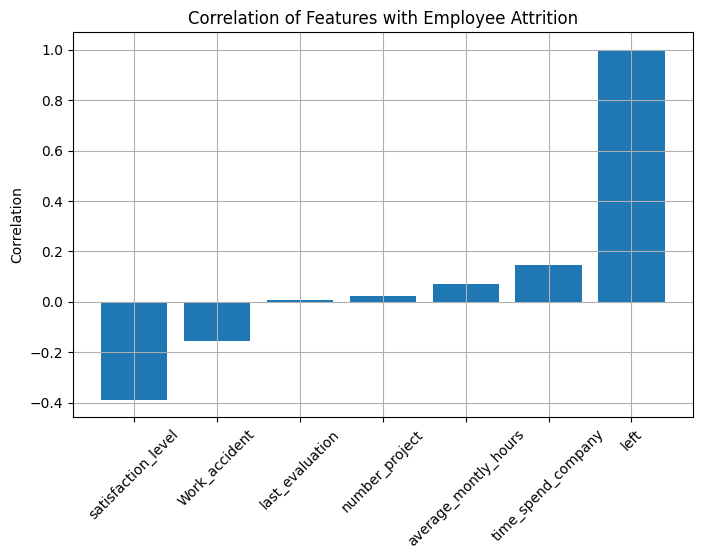

Correlation with Attrition:
satisfaction_level     -0.388375
Work_accident          -0.154622
last_evaluation         0.006567
number_project          0.023787
average_montly_hours    0.071287
time_spend_company      0.144822
left                    1.000000
Name: left, dtype: float64


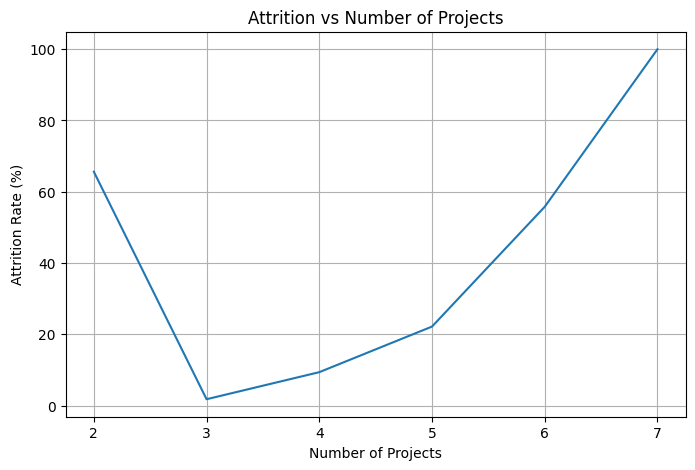

Attrition Rate by Number of Projects:
number_project
2     65.619765
3      1.775586
4      9.369989
5     22.165882
6     55.792164
7    100.000000
Name: left, dtype: float64


In [ ]:
#Question 10: HR Analytics Dataset
#a). What factors most strongly correlate with employee attrition? Use visualizations to show key
#drivers (e.g., satisfaction, overtime, salary).
#b). Are employees with more projects more likely to leave?

import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/hr_analytics.csv')


numeric_cols = [
    'satisfaction_level', 'last_evaluation', 'number_project',
    'average_montly_hours', 'time_spend_company', 'Work_accident'
]

corr = df[numeric_cols + ['left']].corr()['left'].sort_values()

plt.figure(figsize=(8,5))
plt.bar(corr.index, corr.values)
plt.xticks(rotation=45)
plt.title("Correlation of Features with Employee Attrition")
plt.ylabel("Correlation")
plt.grid(True)
plt.show()

print("Correlation with Attrition:")
print(corr)


proj = df.groupby('number_project')['left'].mean() * 100

plt.figure(figsize=(8,5))
plt.plot(proj.index, proj.values)
plt.xlabel("Number of Projects")
plt.ylabel("Attrition Rate (%)")
plt.title("Attrition vs Number of Projects")
plt.grid(True)
plt.show()

print("Attrition Rate by Number of Projects:")
print(proj)
